# Aritificial Neural Network to create a predictive algorithm

Data :- Iris Dataset

Iris data set contain continuous numberical data for 3 classes of flowers
1.) Iris Versicolor
2.) Iris Setosa
3.) Iris Virginica

Based of the Sepal and Petal lengths
and width we can predict flower species.

Our goal is to develop a model capable of classifying an iris plant based on four features. This is a multi-class classification where each sample can belong to ONE of 3 classes (<em>Iris setosa</em>, <em>Iris virginica</em> or <em>Iris versicolor</em>). The network will have 4 input neurons (flower dimensions) and 3 output neurons (scores). Our loss function will compare the target label (ground truth) to the corresponding output score.


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import torch
import torch.nn as nn
import torch.nn.functional as F

from sklearn.model_selection import train_test_split


In [6]:

class Model(nn.Module):

    def __init__(self,input_features=4,h1=8,h2=9,output_features=3):

        # How many layers?
        # For each layer we create an attribute
        # And we decide on the kind of layer while
        # we are creating this.

        # Input Layer(4 features of iris dataset) --> h1 N(Nuerons)
        # --> h2 N Neurons --> Output(3 classes)
        # at least number of neurons should be equal to number of features

        # lets construct this layers
        # First we should instantiate the module that we inherited from
        # nn.Module should be called in inherited module
        # call its own init method

            super().__init__()

            self.fc1 = nn.Linear(input_features,h1)
            # fc1 mean fully connected layer

            self.fc2 = nn.Linear(h1,h2)
            #output of h1 from fc1 will be input  in h1 of fc2

            self.out= nn. Linear(h2,output_features)

            # we can add more layer/ play with number of neurons


    # set our forward propagation method


    def forward(self,x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x

"""
class Model(nn.Module):
    def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
        super().__init__()
        self.fc1 = nn.Linear(in_features,h1)    # input layer
        self.fc2 = nn.Linear(h1, h2)            # hidden layer
        self.out = nn.Linear(h2, out_features)  # output layer

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x
        """

'\nclass Model(nn.Module):\n    def __init__(self, in_features=4, h1=8, h2=9, out_features=3):\n        super().__init__()\n        self.fc1 = nn.Linear(in_features,h1)    # input layer\n        self.fc2 = nn.Linear(h1, h2)            # hidden layer\n        self.out = nn.Linear(h2, out_features)  # output layer\n        \n    def forward(self, x):\n        x = F.relu(self.fc1(x))\n        x = F.relu(self.fc2(x))\n        x = self.out(x)\n        return x\n        '

In [7]:
# Let's instantiate the model using the parameter defaults

torch.manual_seed(32)

model = Model()
model

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)

In [8]:
df = pd.read_csv("iris.csv")
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [9]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0
149,5.9,3.0,5.1,1.8,2.0


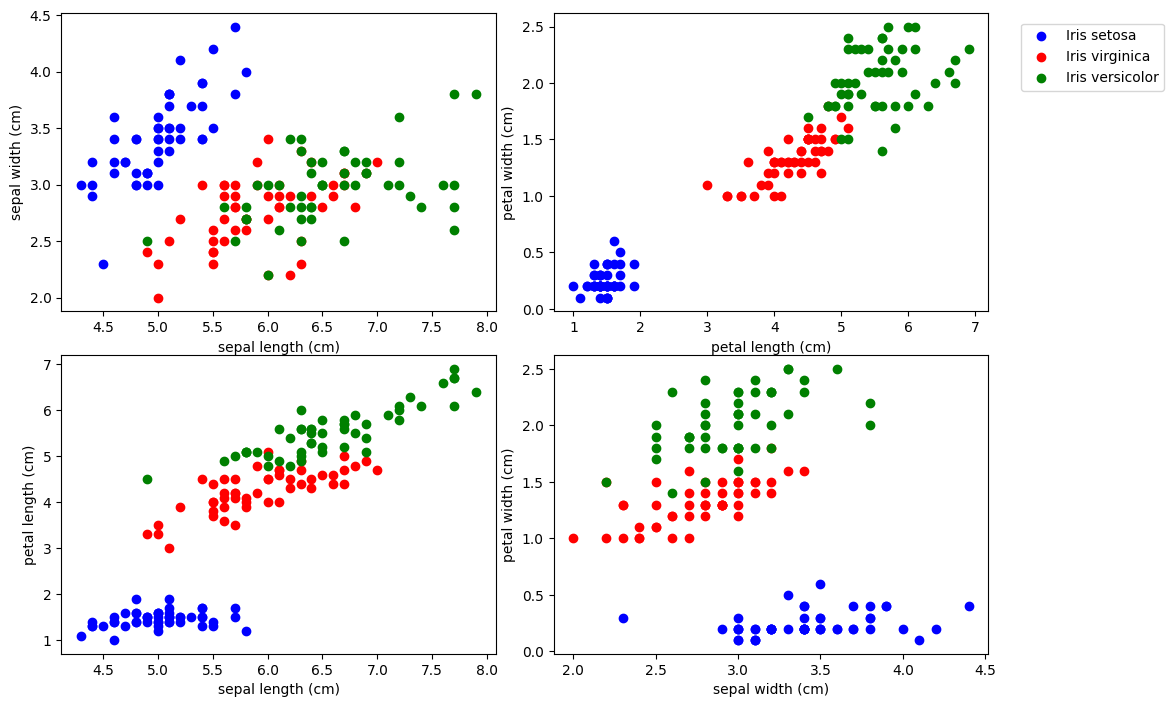

In [10]:
fig,axes = plt.subplots(nrows=2,ncols=2,figsize=(10,7))

#This line creates a figure with a 2x2 grid of subplots,
#setting the figure size to 10x7 inches.
#The fig variable represents the entire figure,
#while axes is an array of the individual subplot objects.

fig.tight_layout()

#This line adjusts the spacing between subplots to
#prevent labels and titles from overlapping.

plots= [(0,1),(2,3),(0,2),(1,3)] # combinations of each column
colors=['b','r','g']
labels=['Iris setosa','Iris virginica','Iris versicolor']

"""
These lines define lists for plot indices, colors, and labels.

plots: A list of tuples, where each tuple represents the
       indices of columns to be plotted in each subplot.

colors: A list of colors for the different data classes.

labels: A list of labels for the legend, corresponding to the different data classes.
"""

for i,ax in enumerate(axes.flat):
    for j in range(3):

        x = df.columns[plots[i][0]]
        y = df.columns[plots[i][1]]

        ax.scatter(df[df['target']==j][x],\
                   df[df['target']==j][y],
                    color=colors[j])
        ax.set(xlabel=x,ylabel=y)

"""
This is a nested loop that iterates through each subplot and each data class (target value).

for i,ax in enumerate(axes.flat): loops through each subplot in the axes array.

for j in range(3): loops through the different target values (0, 1, and 2).

x = df.columns[plots[i][0]] and y = df.columns[plots[i][1]] get
the column names for the x and y axes based on the plots list.

ax.scatter(...) creates a scatter plot of the data points where
target equals j, using the specified color.

ax.set(xlabel=x,ylabel=y) sets the labels for the x and y axes.

"""
fig.legend(labels=labels,loc=3,bbox_to_anchor=(1.0,0.85))
plt.show()

#fig.legend(...) adds a legend to the figure using the labels defined earlier.

#plt.show() displays the plot.



In [11]:
X= df.drop('target',axis=1)
y= df['target']


In [12]:
X = X.values
y = y.values

In [13]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [14]:
y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

In [15]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=33)


In [16]:
# covert in FloatTensor

X_train = torch.FloatTensor(X_train)

X_test = torch.FloatTensor(X_test)

In [17]:
y_train = torch.LongTensor(y_train)

y_test = torch.LongTensor(y_test)

In [18]:
criterion = nn.CrossEntropyLoss()

# criteria we are using in order to measure how far
# off your predictions are from your data
# cross entropy for multi class classifcation problem


optimizer = torch.optim.Adam(model.parameters(),lr=0.01)


In [19]:
model.parameters()

<generator object Module.parameters at 0x7f1d49609150>

In [20]:
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)>

In [21]:
# Train model

# Epoch ?
# start with small number if dataset is large
# then plot loss function to decide number of epchs

# Epoch :- 1 run through all the training data

epochs = 100
losses = []

for i in range(epochs):
    i+=1
    y_pred = model.forward(X_train)
    loss = criterion(y_pred, y_train)
    losses.append(loss)

    # a neat trick to save screen space:
    if i%5 == 0:
        print(f'epoch: {i} and  loss: {loss}')

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()





epoch: 5 and  loss: 1.0432250499725342
epoch: 10 and  loss: 0.9566181898117065
epoch: 15 and  loss: 0.8706161975860596
epoch: 20 and  loss: 0.7923728227615356
epoch: 25 and  loss: 0.7279375791549683
epoch: 30 and  loss: 0.6320289373397827
epoch: 35 and  loss: 0.5237334370613098
epoch: 40 and  loss: 0.41852954030036926
epoch: 45 and  loss: 0.3389274477958679
epoch: 50 and  loss: 0.2672296464443207
epoch: 55 and  loss: 0.20625153183937073
epoch: 60 and  loss: 0.15835250914096832
epoch: 65 and  loss: 0.12517297267913818
epoch: 70 and  loss: 0.1040063202381134
epoch: 75 and  loss: 0.09088238328695297
epoch: 80 and  loss: 0.08255427330732346
epoch: 85 and  loss: 0.07697834074497223
epoch: 90 and  loss: 0.07298814505338669
epoch: 95 and  loss: 0.06995944678783417
epoch: 100 and  loss: 0.06756166368722916


Text(0.5, 0, 'Epoch')

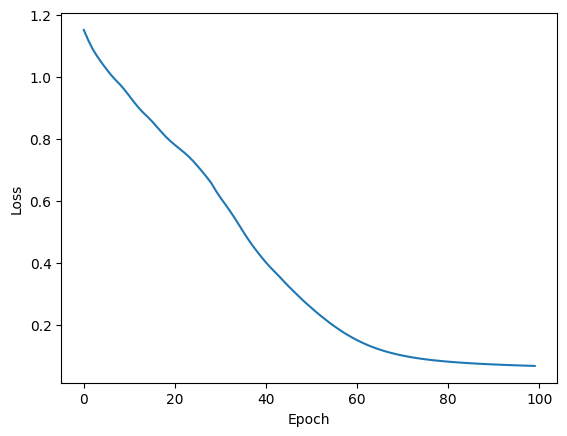

In [22]:
# is 100 Epoch enough?
# lets plot epcoch vs loss function
plt.plot(range(epochs),[loss.detach().numpy() for loss in losses])
plt.ylabel("Loss")
plt.xlabel("Epoch")


In [24]:
# Somewhere between 80- 100 we are really starting to converge

# Validate the model on test data

with torch.no_grad():
# this going to impact the auto gradient engine and deactivate it.
# telling PyTorch that do not worry about backpropagation because
# we are just evaluating our model.
# Don't need to go back abd change those weights based on test data

    y_eval= model.forward(X_test)
    loss=criterion(y_eval,y_test)




In [25]:
loss

# similar loss value as training data set
# indicates good performance.
# it is not overfitting on training data. if that is the case
# then when we evaluate test data loss would be huge



tensor(0.0581)

In [52]:
correct = 0

# how many flowers do we actually evaluate correctly

with torch.no_grad():

    for i,data in enumerate(X_test):

        y_val = model.forward(data)

        # print 1.), 2.)
        # y_val is tensor so to print covert in string

        print(f'{i+1}. )  {str(y_val)}  -> {y_test[i]}')

        print(f'{i+1}. )  Predicted Class:- {str(y_val.argmax().item())} | Actual Class:-  {y_test[i]}')
        # the highest value indicates that network thinks
        # likelihood that the nework thinks that class it belongs to.
        # y_test[i] will print class it belongs to.

        # We have used CrossEntropyLoss, it ends up producing for us
        # at the end of the day is this tensor
        # tensor([-2.1252,  4.8064, -0.8628])  -> 1
        # call that last output layer had 3 values
        # and the greatest value, its going to be at the index
        # position of what class the netowrk thinks that
        # particular flower belongs in.

        # count how many are correct
        # print max value using argmax() from y_val values
        # and compare it with test data
        if y_val.argmax().item() == y_test[i]:
            correct+=1



print(f"We got {correct} correct!")




1. )  tensor([-2.1252,  4.8064, -0.8628])  -> 1
1. )  Predicted Class:- 1 | Actual Class:-  1
2. )  tensor([-1.7985,  5.3098, -1.5449])  -> 1
2. )  Predicted Class:- 1 | Actual Class:-  1
3. )  tensor([  6.3542,   0.8438, -10.0541])  -> 0
3. )  Predicted Class:- 0 | Actual Class:-  0
4. )  tensor([-3.9123,  4.5958,  1.1693])  -> 1
4. )  Predicted Class:- 1 | Actual Class:-  1
5. )  tensor([-7.4713,  3.2021,  5.7853])  -> 2
5. )  Predicted Class:- 2 | Actual Class:-  2
6. )  tensor([-10.4976,   1.6459,   9.6297])  -> 2
6. )  Predicted Class:- 2 | Actual Class:-  2
7. )  tensor([  6.3201,   0.9917, -10.1532])  -> 0
7. )  Predicted Class:- 0 | Actual Class:-  0
8. )  tensor([  7.0468,   0.7059, -10.9137])  -> 0
8. )  Predicted Class:- 0 | Actual Class:-  0
9. )  tensor([-7.2061,  3.3477,  5.3565])  -> 2
9. )  Predicted Class:- 2 | Actual Class:-  2
10. )  tensor([-9.3960,  2.5759,  8.1033])  -> 2
10. )  Predicted Class:- 2 | Actual Class:-  2
11. )  tensor([-9.8808,  2.3475,  8.7141])  ->

In [53]:
# Save the train model to file

torch.save(model.state_dict(),'my_iris_model_Project_2.pt')



In [55]:
new_model = Model()

# this model does not have any idea about the weights or the biases
# should be.

new_model.load_state_dict(torch.load("my_iris_model_Project_2.pt"))


<ipython-input-55-861e7a271caa>:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  new_model.load_state_dict(torch.load("my_iris_model_Project_2.pt"))


<All keys matched successfully>

In [56]:
new_model.eval()


Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)

In [ ]:
# If we want to actually save the entire model
# including its class and parameters
# we have to save it as a pickle file
# So in this case instead of passing in the state dictionary
# we pass model directly.



In [57]:
new_flower = torch.tensor([5.6,3.7,2.2,0.5])


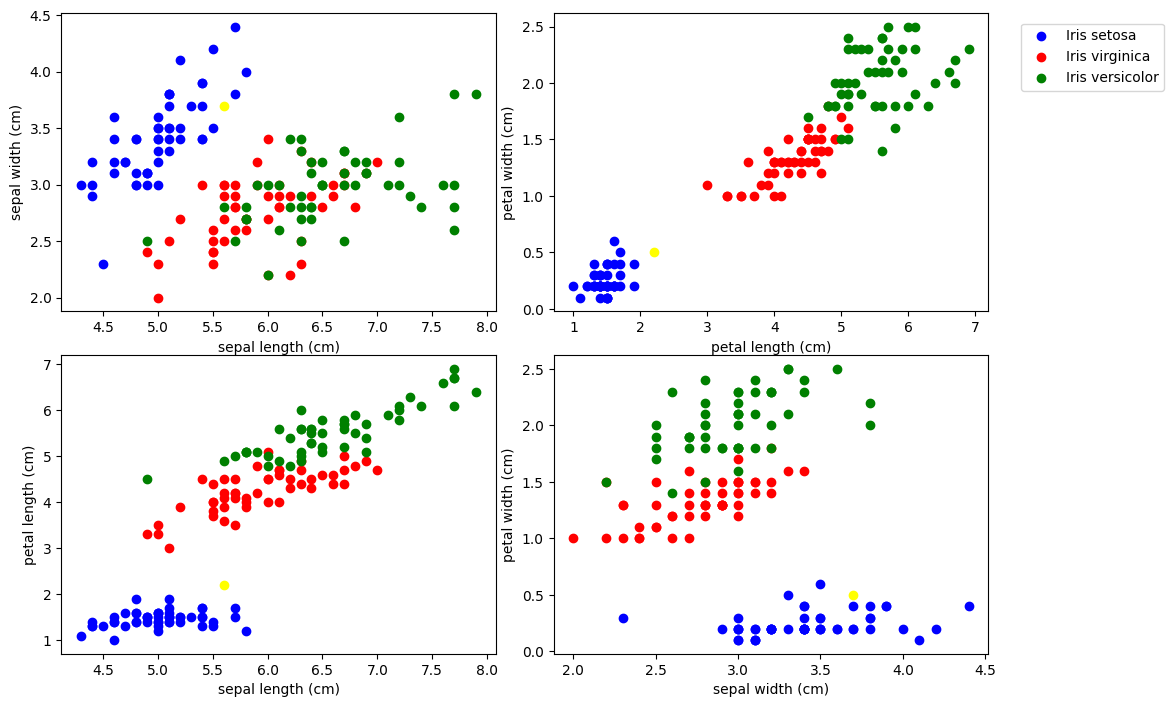

In [61]:
fig,axes = plt.subplots(nrows=2,ncols=2,figsize=(10,7))


fig.tight_layout()


plots= [(0,1),(2,3),(0,2),(1,3)] # combinations of each column
colors=['b','r','g']
labels=['Iris setosa','Iris virginica','Iris versicolor']


for i,ax in enumerate(axes.flat):
    for j in range(3):

        x = df.columns[plots[i][0]]
        y = df.columns[plots[i][1]]

        ax.scatter(df[df['target']==j][x],\
                   df[df['target']==j][y],
                    color=colors[j])
        ax.set(xlabel=x,ylabel=y)

    # Add a plot for our new flower
    ax.scatter(new_flower[plots[i][0]],new_flower[plots[i][1]],color='yellow')

fig.legend(labels=labels,loc=3,bbox_to_anchor=(1.0,0.85))
plt.show()



In [67]:
# Iris setosa is our new flower

with torch.no_grad():

    print(new_model(new_flower))

    print(new_model(new_flower).argmax())


tensor([  5.9522,   1.5596, -10.0054])
tensor(0)
